In [ ]:
#Objectives of the project:    What affects an individual's income????
#1 Understand the dataset
#2 Measures of central tedency
#3 Measures of Dispersion
#4 Distribution of the data
#5 Correlation


In [3]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [4]:
#Loading the dataset "Adult Income dataset"
df = pd.read_csv('/home/titanicdwarf/Documents/Data Analysis projects/Python/income/adult_income.csv')
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,1,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,1,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,1,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,1,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,1,0,3900,40,United-States,<=50K


In [5]:
#1 Understand the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  int64 
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(7), object(8)
memory usage: 3.7+ MB


In [8]:
#Dataset description 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education.num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
sex,32561.0,0.330795,0.470506,0.0,0.0,0.0,1.0,1.0
capital.gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital.loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours.per.week,32561.0,40.431344,12.358681,0.0,40.0,40.0,45.0,99.0


In [9]:
#Measures of central Tedency
#average age of males and females in the data?
df.groupby('sex')['age'].mean()

sex
0    39.433547
1    36.858230
Name: age, dtype: float64

In [10]:
#the value which 95% of the capital gain would lie
df['capital.gain'].quantile(0.95)

5013.0

In [11]:
#qualification of most of the individuals
df['education'].mode()

0    HS-grad
Name: education, dtype: object

In [12]:
#the middle most observation of age for different working class
df.groupby('workclass')['age'].median()

workclass
?                   35.0
Federal-gov         43.0
Local-gov           41.0
Never-worked        18.0
Private             35.0
Self-emp-inc        45.0
Self-emp-not-inc    44.0
State-gov           39.0
Without-pay         57.0
Name: age, dtype: float64

In [15]:
#compare the mean and the trimmed mean of capital gain and comment on the presence of outliers
df['capital.gain'].mean()


#Trimmed mean
import scipy
from scipy import stats

scipy.stats.trim_mean(df['capital.gain'], proportiontocut=0.01)

493.7085331077058

In [17]:
#percentage of the asian-pac-islander race people in the data
(df.race.value_counts()/len(df))*100

White                 85.427352
Black                  9.594300
Asian-Pac-Islander     3.190934
Amer-Indian-Eskimo     0.955130
Other                  0.832284
Name: race, dtype: float64

In [20]:
#3 measures of Disperson
#which occupation has more variability in the working hours?
df.groupby('occupation')['hours.per.week'].std().sort_values(ascending= False).head(5)

occupation
Farming-fishing    17.320156
Priv-house-serv    16.184548
?                  15.010581
Armed-Forces       14.071247
Sales              13.236410
Name: hours.per.week, dtype: float64

In [21]:
#variables which can be excluded from further analysis based on their variability
df.std()

age                   13.640433
fnlwgt            105549.977697
education.num          2.572720
sex                    0.470506
capital.gain        7385.292085
capital.loss         402.960219
hours.per.week        12.358681
dtype: float64

In [22]:
#percentage of variation in work hours for each work class
(df.groupby('workclass')['hours.per.week'].std()/df.groupby('workclass')['hours.per.week'].mean())*100

workclass
?                   46.711116
Federal-gov         21.360037
Local-gov           26.283120
Never-worked              NaN
Private             27.954085
Self-emp-inc        28.473900
Self-emp-not-inc    37.537713
State-gov           29.968071
Without-pay         53.059084
Name: hours.per.week, dtype: float64

In [23]:
#4 Distribution of the data
#function to plot the cateories of the vairable and find the category with the highest frequency
def fun(columns):
    sns.countplot(data=df, x=columns)
    plt.xticks(rotation=90)
    plt.show()
    print('Mode is',df[columns].mode()[0])

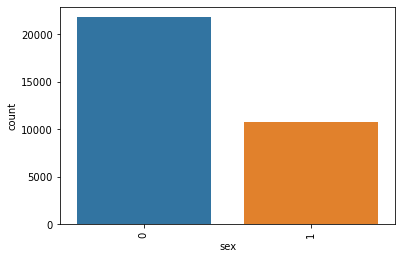

Mode is 0


In [24]:
fun('sex')

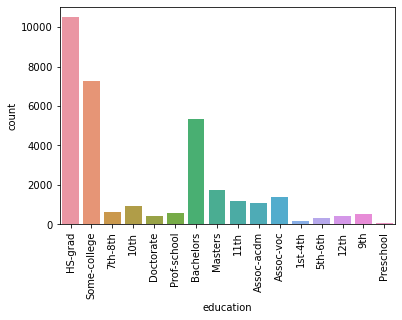

Mode is HS-grad


In [25]:
fun('education')

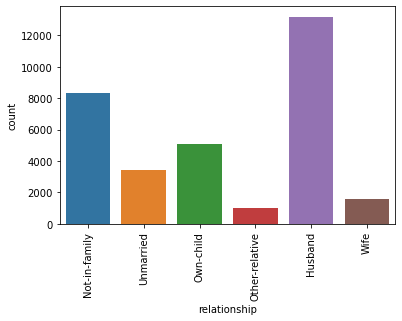

Mode is Husband


In [26]:
fun('relationship')

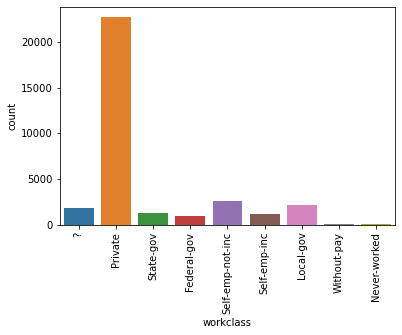

Mode is Private


In [27]:
fun('workclass')

age 0.5587433694130483
fnlwgt 1.4469800945789828
education.num -0.31167586791022966
sex 0.7192925505964604
capital.gain 11.953847687699794
capital.loss 4.594629121679696
hours.per.week 0.22224067717684567


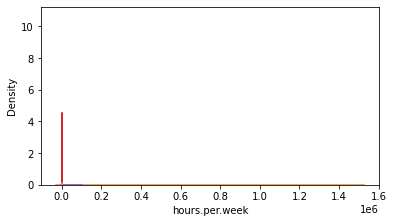

In [31]:
#finding the variables which have normal distribution
plt.figure(figsize=(20,15))
j=1
for i in df.columns:
    if df[i].dtypes == 'float64' or df[i].dtypes == 'int64':
        plt.subplot(5,4,j)
        sns.distplot(df[i])
        j+1
        print(df[i].name,df[i].skew())
plt.tight_layout()
plt.show()

<AxesSubplot:>

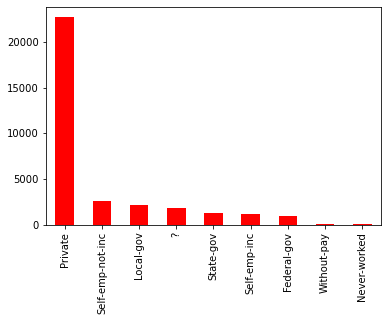

In [32]:
#working class for the most of the population in the data
df.workclass.value_counts().plot(kind='bar',color='red')

In [34]:
#Most time individuals are working per week
df['hours.per.week'].value_counts()

40    15214
50     2819
45     1824
60     1475
35     1296
      ...  
94        1
82        1
92        1
87        1
74        1
Name: hours.per.week, Length: 95, dtype: int64

In [35]:
#Correlation
#age effect on the working hours of a person
df[['age','hours.per.week']].corr()

,age,hours.per.week
age,1.000000,0.069311
hours.per.week,0.069311,1.000000


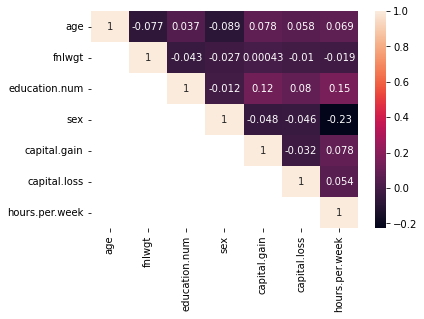

In [37]:
#Triangular correlation matrix
array = np.zeros_like(df.corr())
array[np.tril_indices_from(array,k=-1)]=True
sns.heatmap(df.corr(),mask=array,annot=True)
plt.show()